In [1]:
import pandas as pd
import json
import os
import math
import numpy as np
import librosa, librosa.display

In [2]:
df = pd.read_csv("C:\\Users\\Janan\\Downloads\\Data (1)\\features_3_sec.csv")
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [3]:
print("Dataset has",df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

Dataset has (9990, 60)
Count of Positive and Negative samples


,label,count
0,blues,1000
1,jazz,1000
2,pop,1000
3,reggae,1000
4,metal,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


In [4]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [6]:
df = df.drop(labels="filename", axis=1)

In [7]:
df.head(10)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,4371.985614,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,4325.026668,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,3625.280386,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,3586.934721,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,3505.522649,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


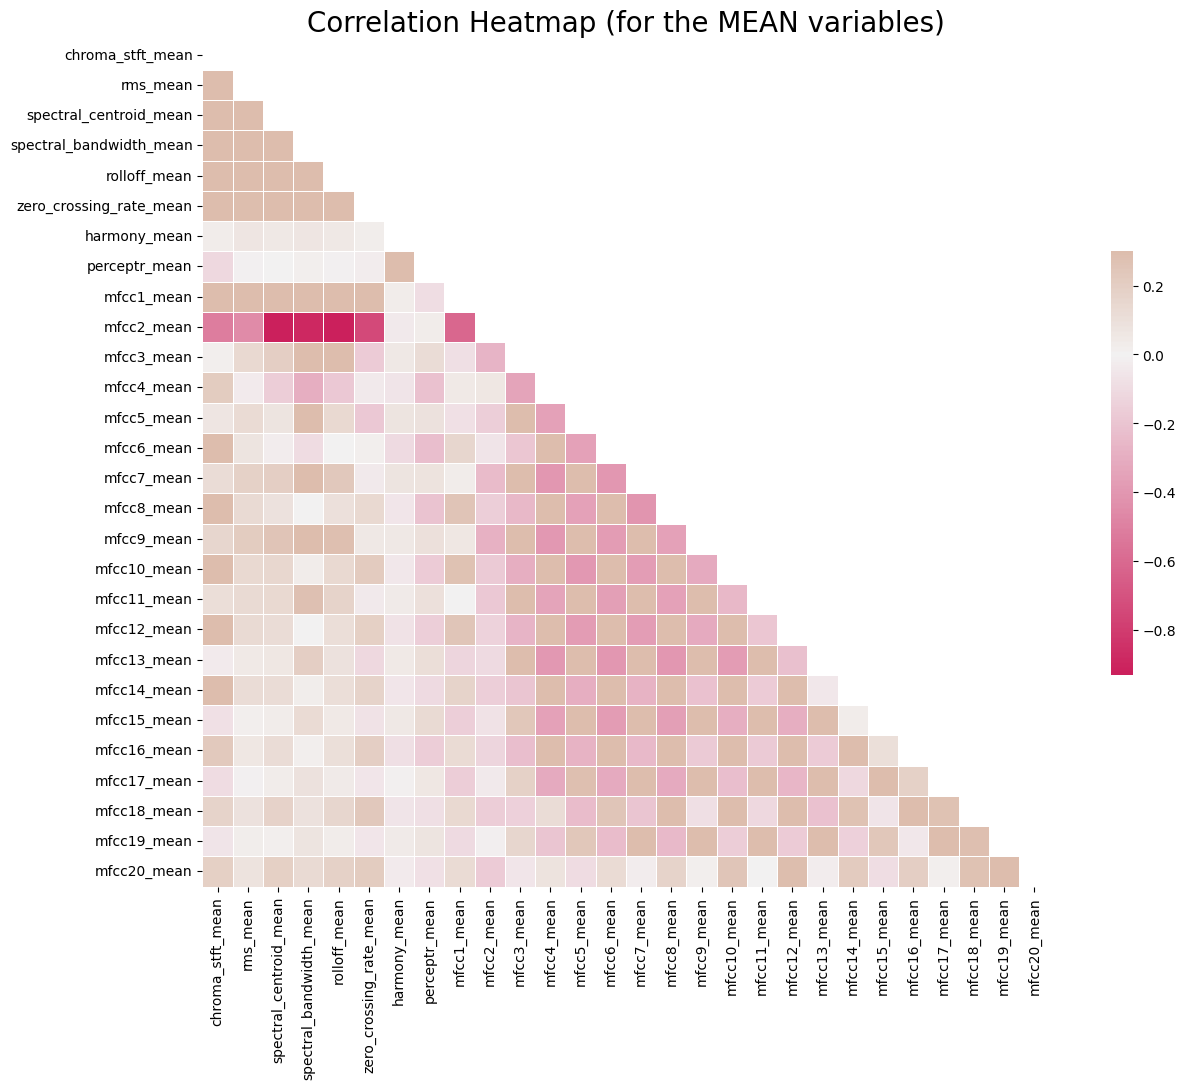

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr_Heatmap.png")

C:\Users\Janan\AppData\Local\Temp\ipykernel_22820\3760914025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');


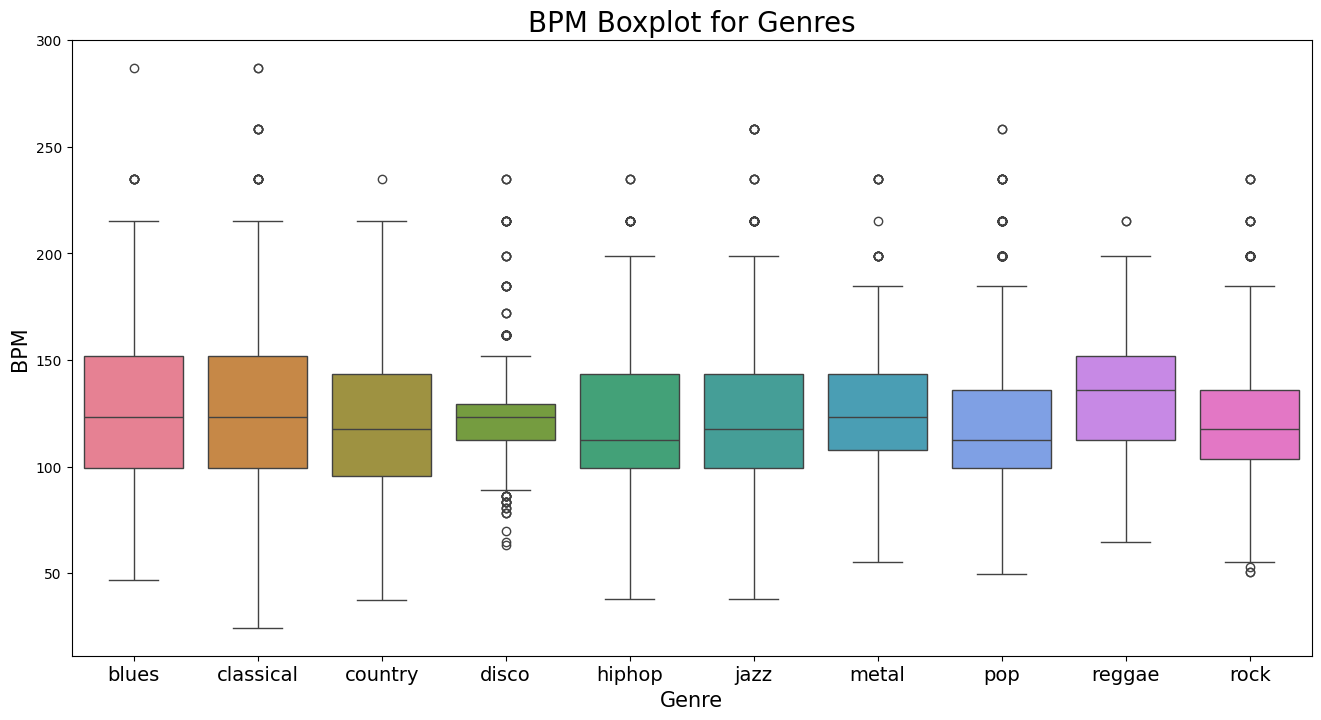

In [9]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

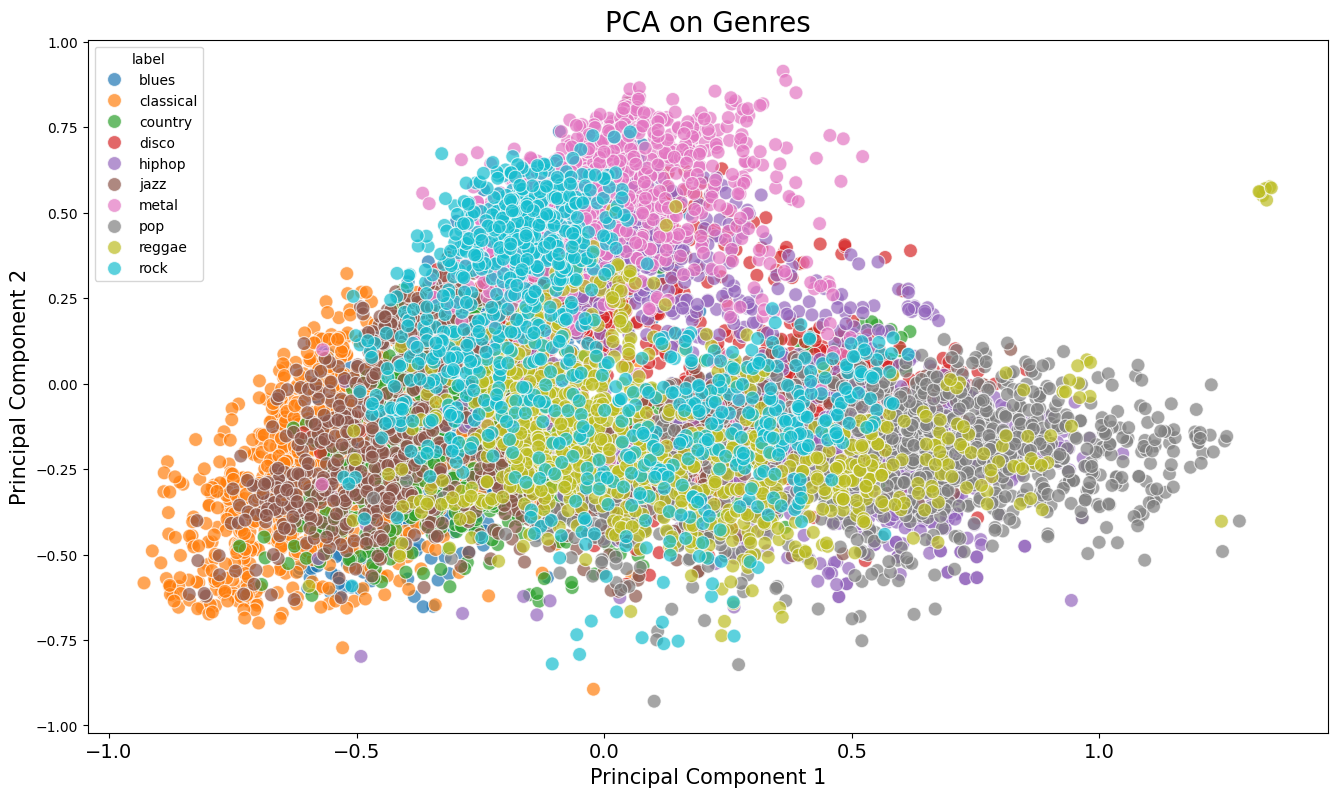

In [10]:
import sklearn.preprocessing as skp
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

# normalize
cols = X.columns
min_max_scaler = skp.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA_Scattert.png")

In [71]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt
import random

import librosa
import math

In [72]:
DATASET_PATH = "C:\\Users\\Janan\\Downloads\\Data (1)\\genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [73]:
import librosa
import json
import os
import math

SAMPLE_RATE = 22050  # Or your preferred sample rate
SAMPLES_PER_TRACK = SAMPLE_RATE * 30  # 30 seconds of audio

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs and saves to JSON."""

    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            semantic_label = dirpath.split(os.sep)[-1]  # Use os.sep for path splitting
            data["mapping"].append(semantic_label)
            print(f"\nProcessing: {semantic_label}")

            for f in filenames:
                file_path = os.path.join(dirpath, f)

                if file_path != '/content/drive/MyDrive/Music Genre/Data/genres_original/jazz/jazz.00054.wav': # Example exclusion (consider removing or making more general)
                    try:  # Try to load the file
                        signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                        for d in range(num_segments):
                            start = samples_per_segment * d
                            finish = start + samples_per_segment

                            try:  # Handle MFCC extraction errors
                                mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                                mfcc = mfcc.T

                                if len(mfcc) == num_mfcc_vectors_per_segment:
                                    data["mfcc"].append(mfcc.tolist())
                                    data["labels"].append(i - 1)
                                    print(f"{file_path}, segment:{d+1}")

                            except Exception as mfcc_error:
                                print(f"Error extracting MFCCs for {file_path}, segment {d+1}: {mfcc_error}")

                    except Exception as load_error:  # Handle loading errors
                        print(f"Error loading {file_path}: {load_error}")
                        continue  # Skip to the next file

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


# Example usage (make sure paths are correct)
DATASET_PATH = "C:\\Users\\Janan\\Downloads\\Data (1)\\genres_original"  # Windows path
JSON_PATH = "data_10.json"
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: blues
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:1
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:2
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:3
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:4
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:5
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:6
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:7
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:8
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:9
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:10
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00001.wav, segment:1
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00001

C:\Users\Janan\AppData\Local\Temp\ipykernel_22820\3590757572.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
C:\Users\Janan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00055.wav, segment:5
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00055.wav, segment:6
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00055.wav, segment:7
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00055.wav, segment:8
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00055.wav, segment:9
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00055.wav, segment:10
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00056.wav, segment:1
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00056.wav, segment:2
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00056.wav, segment:3
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00056.wav, segment:4
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00056.wav, segment:5
C:\Users\Janan\Downloads\Data (1)\genres_original\jazz\jazz.00056.wav, segment:6
C:\Users\Janan\Downloads\Da

In [64]:
# Example usage (make sure paths are correct)
DATASET_PATH = "C:\\Users\\Janan\\Downloads\\Data (1)\\genres_original"  # Windows path
JSON_PATH = "data_10.json"
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: blues
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:1
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:2
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:3
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:4
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:5
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:6
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:7
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:8
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:9
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00000.wav, segment:10
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00001.wav, segment:1
C:\Users\Janan\Downloads\Data (1)\genres_original\blues\blues.00001

In [76]:
# path to json
DATA_PATH = "C:\\Users\\Janan\\data_10.json"

In [77]:
def load_data(data_path):

    with open(data_path, "r") as f:
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [78]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [79]:
X.shape

(9986, 130, 13)

In [80]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [81]:
X_train.shape

(7489, 130, 13, 1)

In [82]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [83]:
from keras.regularizers import l2
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())


# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(128, (2, 2), activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128, activation='relu',kernel_initializer='he_uniform',kernel_regularizer=l2(0.0001)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

C:\Users\Janan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
             EarlyStopping(patience=3)
]

In [86]:
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 6, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 6, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 4, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 2, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 31, 2, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 2, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 1, 128)          │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 1, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 1, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         245,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 300,298 (1.15 MB)

 Trainable params: 299,594 (1.14 MB)

 Non-trainable params: 704 (2.75 KB)

In [87]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100,callbacks=callbacks)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.2345 - loss: 2.6497 - val_accuracy: 0.4830 - val_loss: 1.5255
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.4005 - loss: 1.9119 - val_accuracy: 0.5182 - val_loss: 1.4293
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.4576 - loss: 1.6506 - val_accuracy: 0.5543 - val_loss: 1.3084
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.5075 - loss: 1.4922 - val_accuracy: 0.5719 - val_loss: 1.2585
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.5244 - loss: 1.4120 - val_accuracy: 0.5903 - val_loss: 1.2141
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.5578 - loss: 1.3227 - val_accuracy: 0.5783 - val_loss: 1.2148
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.5771 - loss: 1.2657 - val_accuracy: 0.6163 - val_loss: 1.1313
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.5859 - loss: 1

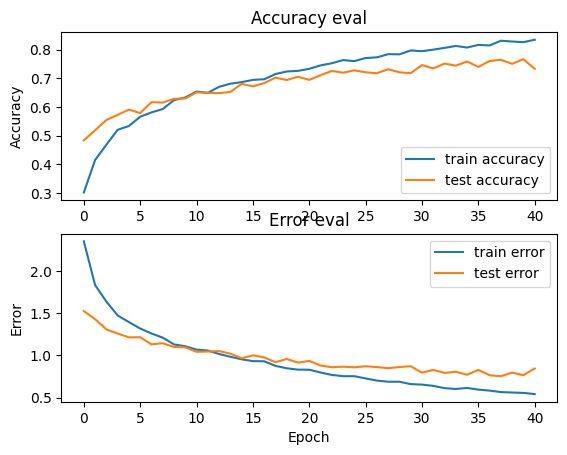

In [88]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()


# plot accuracy and error as a function of the epochs
plot_history(history)

In [89]:
import pandas as pd
metrics_df = pd.DataFrame(history.history)
metrics_df.tail(10)

,accuracy,loss,val_accuracy,val_loss
31,0.799573,0.639038,0.734081,0.828335
32,0.805715,0.612240,0.750901,0.792674
33,0.812392,0.602461,0.743692,0.805935
34,0.806917,0.614710,0.758110,0.771101
35,0.816130,0.594961,0.739287,0.828511
36,0.814127,0.582942,0.759712,0.764502
37,0.830685,0.565496,0.764117,0.753587
38,0.827881,0.560288,0.750100,0.796143
39,0.825611,0.555661,0.766119,0.766149
40,0.834023,0.541881,0.732479,0.844667


In [90]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - 18ms/step - accuracy: 0.7325 - loss: 0.8447

Test accuracy: 0.7324789762496948


In [91]:
model_cnn.save("MusicGenre_CNN.h5")

In [92]:
new_model = keras.models.load_model("MusicGenre_CNN.h5")
new_model.evaluate(X_test,y_test,batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7342 - loss: 0.8489


[0.8446671962738037, 0.7324789762496948]

In [93]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [94]:
X_to_predict.shape

(130, 13, 1)

In [95]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [96]:
X_to_predict.shape

(1, 130, 13, 1)

In [97]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


In [98]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 3


C:\Users\Janan\AppData\Local\Temp\ipykernel_22820\3289486019.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


In [99]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Genre: 2


C:\Users\Janan\AppData\Local\Temp\ipykernel_22820\2236552316.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


In [100]:
import random
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Genre: 1

Real Genre: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


C:\Users\Janan\AppData\Local\Temp\ipykernel_22820\683555675.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", int(predicted_index))


Predicted Genre: 3

Real Genre: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Genre: 0

Real Genre: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Genre: 5

Real Genre: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Genre: 6

Real Genre: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Genre: 4

Real Genre: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Genre: 7

Real Genre: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Genre: 0

Real Genre: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Genre: 8

Real Genre: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Genre: 2


In [117]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)
  
  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [177]:
import librosa

def process_input(audio_file, track_duration):
    NUM_MFCC = 13        # Number of MFCC coefficients to extract
    N_FTT = 2048         # FFT window size
    HOP_LENGTH = 512     # Hop length for STFT
    sample_rate = 22050  # Common sample rate for audio processing
    signal, sr = librosa.load(audio_file, sr=sample_rate)  # Load audio

    samples_per_segment = int(sample_rate * track_duration)
    
    start = 0
    finish = start + samples_per_segment

    # Extract MFCC features correctly
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sr, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T  # Transpose to match expected shape

    return mfcc

In [178]:
genre_dict = {0:"disco ",1:"pop",2:"classical",3:"metal",4:"rock",5:"blues",6:"hiphop",7:"reggae",8:"country",9:"jazz"}

In [213]:
new_input_mfcc = process_input("C:\\Users\\Janan\\Music\\sample.mp3", 30)

In [214]:
type(new_input_mfcc)

numpy.ndarray

In [215]:
new_input_mfcc.shape

(1292, 13)

In [216]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 1292, 13, 1)

In [217]:
print(model_cnn.input_shape)

(None, 130, 13, 1)


In [218]:
print(X_to_predict.shape)

(1, 1292, 13, 1)


In [219]:
X_to_predict = X_to_predict[:, :1920]  # Truncate to match expected shape

In [220]:
X_to_predict = X_to_predict.reshape(1, 16796)  # Reshape manually

In [221]:
print(X_to_predict.shape)
print(type(X_to_predict))

(1, 16796)
<class 'numpy.ndarray'>


In [222]:
import numpy as np
X_to_predict = np.array(X_to_predict, dtype=np.float32)

In [223]:
X_to_predict = np.nan_to_num(X_to_predict)

In [224]:
X_to_predict = X_to_predict.reshape(1, 16796)

In [225]:
print(model_cnn.input_shape)  
print(X_to_predict.shape)

(None, 130, 13, 1)
(1, 16796)


In [226]:
print(X_to_predict.shape)

(1, 16796)


In [227]:
import numpy as np

# Flatten the input (if necessary)
X_to_predict = X_to_predict.flatten()

# Trim to match the required shape (130 * 13 = 1690 elements)
X_to_predict = X_to_predict[:(130 * 13)]  # Keep only first 1690 elements

# Reshape into (1, 130, 13, 1)
X_to_predict = X_to_predict.reshape(1, 130, 13, 1)

print("Fixed shape:", X_to_predict.shape)  # Should print (1, 130, 13, 1)

Fixed shape: (1, 130, 13, 1)


In [228]:
prediction = model_cnn.predict(X_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


In [229]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Predicted Genre: rock


C:\Users\Janan\AppData\Local\Temp\ipykernel_22820\484621637.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Genre:", genre_dict[int(predicted_index)])
